# Lectura: Transformaciones Comunes y Técnicas de Optimización en Spark

Cuando trabajas con DataFrames de PySpark para el procesamiento de datos, es importante conocer los dos tipos de transformaciones: estrechas y amplias. 

Las transformaciones estrechas en Spark funcionan dentro de las particiones sin mover datos entre ellas. Se aplican localmente a cada partición, evitando el intercambio de datos. 
Por otro lado, las transformaciones amplias en Spark implican redistribuir y mover datos entre particiones, lo que a menudo conduce a operaciones más intensivas en recursos y complejas.

Para entender mejor este concepto, echemos un vistazo a la siguiente ilustración.

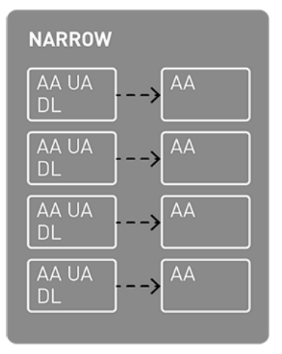

Dentro de las transformaciones estrechas, los datos se transfieren sin ejecutar operaciones de intercambio de datos.

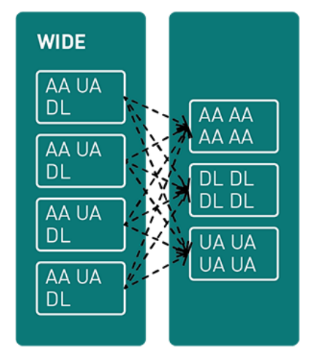

Las transformaciones amplias implican el intercambio de datos entre particiones.

## Ejemplos de transformaciones estrechas

Las transformaciones estrechas se pueden comparar con realizar operaciones sencillas en conjuntos de datos distintos. Considera tener varios tipos de datos en contenedores separados. Puedes realizar acciones en cada contenedor de datos o mover datos entre contenedores de forma independiente sin necesidad de interacción o transferencia. Ejemplos de transformaciones estrechas incluyen modificar piezas individuales de datos, seleccionar elementos específicos o combinar dos contenedores de datos.



## 1. Map: Aplicar una función a cada elemento en el conjunto de datos.

In [ ]:
# Installing required packages
#!pip install pyspark
#!pip install findspark
#!pip install pandas

In [ ]:

sc.stop()

In [ ]:
from pyspark import SparkContext
sc = SparkContext("local", "MapExample")
data = [1, 2, 3, 4, 5]
rdd = sc.parallelize(data)
mapped_rdd = rdd.map(lambda x: x * 2)
mapped_rdd.collect() # Output: [2, 4, 6, 8, 10]


## 2. Filtro: Seleccionando elementos según una condición especificada.

In [ ]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
sc.stop() 

sc = SparkContext("local", "FilterExample")
data = [1, 2, 3, 4, 5]
rdd = sc.parallelize(data)
filtered_rdd = rdd.filter(lambda x: x % 2 == 0)
filtered_rdd.collect() # Output: [2, 4]

[2, 4]

## 3. Unión: Combinando dos conjuntos de datos con el mismo esquema.

In [11]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
sc.stop() 

sc = SparkContext("local", "UnionExample")
rdd1 = sc.parallelize([1, 2, 3])
rdd2 = sc.parallelize([4, 5, 6])
union_rdd = rdd1.union(rdd2)
union_rdd.collect() # Output: [1, 2, 3, 4, 5, 6]

[1, 2, 3, 4, 5, 6]

## Ejemplos de transformaciones amplias

Las transformaciones amplias se pueden comparar con tareas realizadas en equipo y donde se necesita información de diferentes grupos para concluir. Imagina que tienes un grupo de amigos, cada uno con una pieza de un rompecabezas. Para poder armar el rompecabezas, quizás necesites intercambiar piezas entre tus amigos para que todo encaje. Este tipo de tareas son un buen ejemplo de transformación amplia. Tales tareas pueden ser un poco más complicadas porque todos necesitan colaborar y mover piezas.

## 1. GroupBy: Agregando datos basados en una clave específica.

In [12]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
sc.stop() 

sc = SparkContext("local", "GroupByExample")
data = [("apple", 2), ("banana", 3), ("apple", 5), ("banana", 1)]
rdd = sc.parallelize(data)
grouped_rdd = rdd.groupBy(lambda x: x[0])
sum_rdd = grouped_rdd.mapValues(lambda values: sum([v[1] for v in values]))
sum_rdd.collect() # Output: [('apple', 7), ('banana', 4)]

[('apple', 7), ('banana', 4)]

## 2. Unir: Combinar dos conjuntos de datos basados en una clave común.

In [13]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
sc.stop() 

sc = SparkContext("local", "JoinExample")
rdd1 = sc.parallelize([("apple", 2), ("banana", 3)])
rdd2 = sc.parallelize([("apple", 5), ("banana", 1)])
joined_rdd = rdd1.join(rdd2)
joined_rdd.collect() # Output: [('apple', (2, 5)), ('banana', (3, 1))]

[('apple', (2, 5)), ('banana', (3, 1))]

## 3. Ordenar: Reorganizar datos según un criterio específico.

In [14]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
sc.stop() 

sc = SparkContext("local", "SortExample")
data = [4, 2, 1, 3, 5]
rdd = sc.parallelize(data)
sorted_rdd = rdd.sortBy(lambda x: x, ascending=True)
sorted_rdd.collect() # Output: [1, 2, 3, 4, 5]

[1, 2, 3, 4, 5]

Las transformaciones amplias son similares a reordenar y redistribuir datos entre diferentes grupos. Imagina tener conjuntos de datos que deseas combinar u organizar de una nueva manera. Sin embargo, esta tarea no es tan sencilla como trabajar con un solo conjunto de datos. Necesitas coordinar y mover datos entre estos conjuntos, lo que implica más complejidad. Por ejemplo, fusionar dos conjuntos de datos basados en un atributo común requiere reorganizar los datos entre ellos, convirtiéndolo en una transformación amplia en la ingeniería de datos.

## PySpark DataFrame: Transformaciones comunes basadas en reglas

La API de DataFrame en PySpark ofrece varias transformaciones basadas en reglas predefinidas. Estas transformaciones están diseñadas para mejorar la ejecución de consultas y aumentar el rendimiento general. Echemos un vistazo a algunas transformaciones comunes basadas en reglas.

1. **Predicate pushdown**: Empujar condiciones de filtrado más cerca de la fuente de datos antes de procesar para minimizar el movimiento de datos.

2. **Constant folding**: Evaluar expresiones constantes durante la compilación de consultas para reducir la computación durante el tiempo de ejecución.

3. **Column pruning**: Eliminar columnas innecesarias del plan de consulta para mejorar la eficiencia del procesamiento.

4. **Join reordering**: Reorganizar las operaciones de unión para minimizar el tamaño de los datos intermedios y mejorar el rendimiento de la unión.

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("RuleBasedTransformations").getOrCreate()

# Sample input data for DataFrame 1
data1 = [
    ("Alice", 25, "F"),
    ("Bob", 30, "M"),
    ("Charlie", 22, "M"),
    ("Diana", 28, "F")
]

# Sample input data for DataFrame 2
data2 = [
    ("Alice", "New York"),
    ("Bob", "San Francisco"),
    ("Charlie", "Los Angeles"),
    ("Eve", "Chicago")
]

# Create DataFrames
columns1 = ["name", "age", "gender"]
df1 = spark.createDataFrame(data1, columns1)

columns2 = ["name", "city"]
df2 = spark.createDataFrame(data2, columns2)

# Applying Predicate Pushdown (Filtering)
filtered_df = df1.filter(col("age") > 25)

# Applying Constant Folding
folded_df = filtered_df.select(col("name"), col("age") + 2)

# Applying Column Pruning
pruned_df = folded_df.select(col("name"))

# Join Reordering
reordered_join = df1.join(df2, on="name")

# Show the final results
print("Filtered DataFrame:")
filtered_df.show()

print("Folded DataFrame:")
folded_df.show()

print("Pruned DataFrame:")
pruned_df.show()

print("Reordered Join DataFrame:")
reordered_join.show()

# Stop the Spark session
spark.stop()

Filtered DataFrame:
+-----+---+------+
| name|age|gender|
+-----+---+------+
|  Bob| 30|     M|
|Diana| 28|     F|
+-----+---+------+

Folded DataFrame:
+-----+---------+
| name|(age + 2)|
+-----+---------+
|  Bob|       32|
|Diana|       30|
+-----+---------+

Pruned DataFrame:
+-----+
| name|
+-----+
|  Bob|
|Diana|
+-----+

Reordered Join DataFrame:
+-------+---+------+-------------+
|   name|age|gender|         city|
+-------+---+------+-------------+
|  Alice| 25|     F|     New York|
|    Bob| 30|     M|San Francisco|
|Charlie| 22|     M|  Los Angeles|
+-------+---+------+-------------+



## Técnicas de optimización utilizadas en Spark SQL

1. **Empuje de predicados**: Aplica un filtro al DataFrame “df1” para seleccionar solo las filas donde la columna “edad” es mayor que 25.

2. **Plegado de constantes**: Realiza una operación aritmética en la columna “edad” en el folded_df, sumando un valor constante de 2.

3. **Eliminación de columnas**: Selecciona solo la columna “nombre” en el pruned_df, eliminando columnas innecesarias del plan de consulta.

4. **Reordenamiento de uniones**: Realiza una unión entre df1 y df2 en la columna “nombre”, permitiendo que Spark potencialmente reordene la unión para mejorar el rendimiento.

## Técnicas de optimización basadas en costos en Spark

Spark emplea técnicas de optimización basadas en costos para mejorar la eficiencia de la ejecución de consultas. Estos métodos implican estimar y analizar los costos asociados con las consultas, lo que lleva a decisiones más informadas que resultan en un mejor rendimiento.

1. **Ejecución de consultas adaptativa**: Ajusta dinámicamente el plan de consulta durante la ejecución basado en estadísticas de tiempo de ejecución para optimizar el rendimiento.

2. **Reordenamiento de uniones basado en costos**: Optimiza el orden de las uniones basado en los costos estimados de diferentes caminos de unión.

3. **Unión hash por difusión**: Optimiza uniones de tablas pequeñas al difundir una tabla a todos los nodos, reduciendo el movimiento de datos.

4. **Particionamiento de mezclas y gestión de memoria**: Gestiona eficientemente el movimiento de datos durante operaciones como groupBy y agregación y optimiza el uso de memoria.

Al utilizar estos métodos, Spark se esfuerza por ofrecer capacidades de procesamiento de datos eficientes y escalables. Es esencial comprender la aplicación efectiva de estas transformaciones y optimizaciones para alcanzar el mejor rendimiento posible de las consultas y la utilización óptima de los recursos del sistema.

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("CostBasedOptimization").getOrCreate()

# Sample input data for DataFrame 1
data1 = [
    ("Alice", 25),
    ("Bob", 30),
    ("Charlie", 22),
    ("Diana", 28)
]

# Sample input data for DataFrame 2
data2 = [
    ("Alice", "New York"),
    ("Bob", "San Francisco"),
    ("Charlie", "Los Angeles"),
    ("Eve", "Chicago")
]

# Create DataFrames
columns1 = ["name", "age"]
df1 = spark.createDataFrame(data1, columns1)

columns2 = ["name", "city"]
df2 = spark.createDataFrame(data2, columns2)

# Enable adaptive query execution
spark.conf.set("spark.sql.adaptive.enabled", "true")

# Applying Adaptive Query Execution (Runtime adaptive optimization)
optimized_join = df1.join(df2, on="name")

# Show the optimized join result
print("Optimized Join DataFrame:")
optimized_join.show()

# Stop the Spark session
spark.stop()

Optimized Join DataFrame:
+-------+---+-------------+
|   name|age|         city|
+-------+---+-------------+
|  Alice| 25|     New York|
|    Bob| 30|San Francisco|
|Charlie| 22|  Los Angeles|
+-------+---+-------------+



En este ejemplo, creamos dos DataFrames (df1 y df2) con datos de entrada de muestra. Luego, habilitamos la función de ejecución de consultas adaptativas configurando el parámetro de configuración "spark.sql.adaptive.enabled" a "true". La Ejecución de Consultas Adaptativa permite que Spark ajuste el plan de consulta durante la ejecución basado en estadísticas en tiempo de ejecución.

El código realiza una unión entre df1 y df2 en la columna "name". La ejecución de consultas adaptativas de Spark ajusta dinámicamente el plan de consulta basado en estadísticas en tiempo de ejecución, lo que puede resultar en un rendimiento mejorado.